In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [4]:
# reading and splitting data
df = pd.read_csv("../data/NOAA_Storms.csv")
X = df[['Max_Wind', 'Min_Pressure', 'Radius_Max_Wind']]
Y = df['Storm_Status']
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=.4)

In [8]:
# Look at training data
trainX.head()

,Max_Wind,Min_Pressure,Radius_Max_Wind
1823,40.0,1004.0,20.0
1838,75.0,970.0,10.0
107,90.0,955.0,25.0
1293,60.0,985.0,20.0
1877,75.0,979.0,30.0


In [9]:
# Look at testing data
testX.head()

,Max_Wind,Min_Pressure,Radius_Max_Wind
81,90.0,954.0,30.0
998,80.0,962.0,30.0
994,80.0,974.0,35.0
745,45.0,971.0,40.0
1177,25.0,1009.0,60.0


In [14]:
# First, normalize the data
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.fit_transform(testX)

In [15]:
trainX

array([[-0.46036246,  0.6259774 , -0.77905712],
       [ 0.85096393, -1.00716133, -1.04369867],
       [ 1.41296095, -1.72766371, -0.64673635],
       ...,
       [-0.46036246, -0.23862545,  0.27950904],
       [ 0.47629924, -0.04649149, -0.91137789],
       [-0.27303012,  0.52991042,  0.80879213]])

In [65]:
# Fit the SVM model 1 with training data
# We are using linear kernel
lm_model1 = SVC(kernel='linear', C=1)
lm_model1.fit(trainX, trainY)
print("Accuracy for C=1:",lm_model1.score(testX, testY))

lm_model2 = SVC(kernel='linear', C=2)
lm_model2.fit(trainX, trainY)
print("Accuracy for C=2:", lm_model2.score(testX, testY))

lm_model3 = SVC(kernel='linear', C=10)
lm_model3.fit(trainX, trainY)
print("Accuracy for C=10:",lm_model3.score(testX, testY))

Accuracy for C=1: 0.8040865384615384
Accuracy for C=2: 0.7884615384615384
Accuracy for C=10: 0.7716346153846154


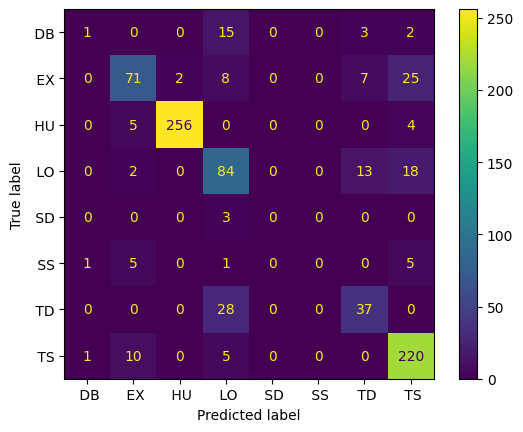

In [71]:
import matplotlib.pyplot as plt

# confusion matrix for linear model
predictions = lm_model1.predict(testX)
cm = confusion_matrix(testY, predictions, labels=lm_model1.classes_)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lm_model1.classes_)
cm_plot.plot()

In [125]:
# Fit the SVM model 2 with training data
# We are using rbf kernel
rbf_model1 = SVC(kernel='rbf', gamma=.5, C=1)
rbf_model1.fit(trainX, trainY)
print("Accuracy for C=1:", rbf_model1.score(testX, testY))

rbf_model2 = SVC(kernel='rbf', gamma=.5, C=2)
rbf_model2.fit(trainX, trainY)
print("Accuracy for C=2:", rbf_model2.score(testX, testY))

rbf_model3 = SVC(kernel='rbf', gamma=.5, C=5)
rbf_model3.fit(trainX, trainY)
print("Accuracy for C=5:", rbf_model3.score(testX, testY))


Accuracy for C=1: 0.8076923076923077
Accuracy for C=2: 0.8052884615384616
Accuracy for C=5: 0.7776442307692307


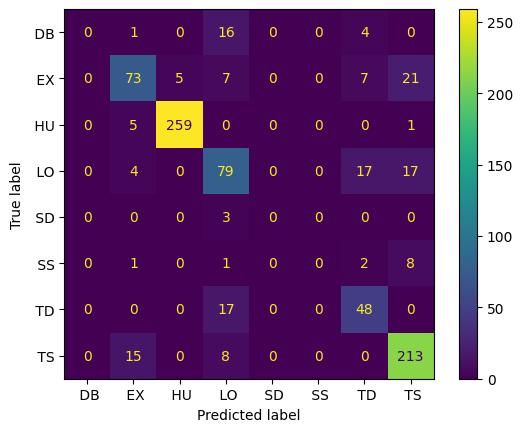

In [123]:
# confusion matrix for rbf model
predictions = rbf_model1.predict(testX)
cm = confusion_matrix(testY, predictions, labels=rbf_model1.classes_)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rbf_model1.classes_)
cm_plot.plot()

In [132]:
# Fit the SVM model 3 with training data
# We are using polynomial
poly_model1 = SVC(kernel='poly', gamma=1, C=.1)
poly_model1.fit(trainX, trainY)
print("Accuracy for C=.1:", poly_model1.score(testX, testY))

poly_model2 = SVC(kernel='poly', gamma=1, C=1)
poly_model2.fit(trainX, trainY)
print("Accuracy for C=1:", poly_model2.score(testX, testY))

poly_model3 = SVC(kernel='poly', gamma=1, C=5)
poly_model3.fit(trainX, trainY)
print("Accuracy for C=5:", poly_model3.score(testX, testY))

Accuracy for C=.1: 0.7391826923076923
Accuracy for C=1: 0.7884615384615384
Accuracy for C=5: 0.7800480769230769


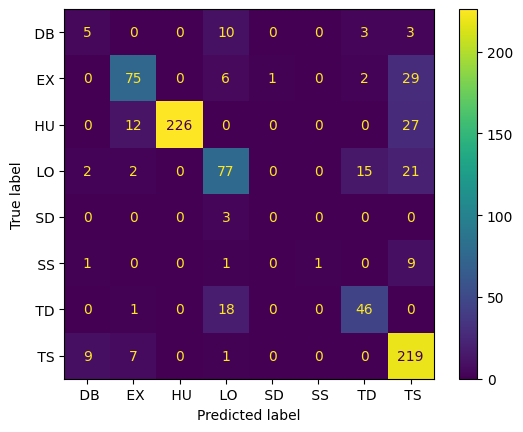

In [133]:
# confusion matrix for polynomial model
predictions = poly_model3.predict(testX)
cm = confusion_matrix(testY, predictions, labels=poly_model3.classes_)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=poly_model3.classes_)
cm_plot.plot()

Text(0, 0.5, 'Accuracy Rate')

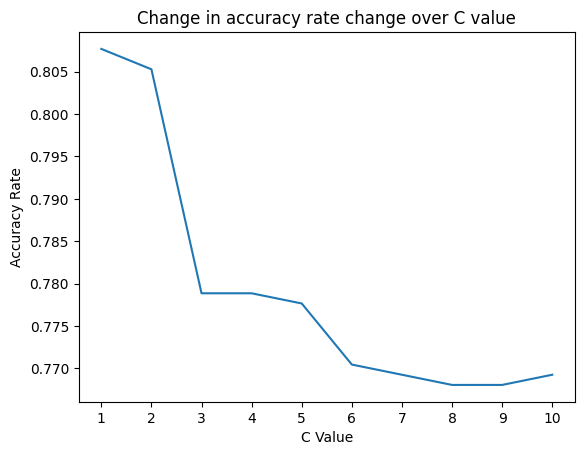

In [119]:
# graphs to show accuracy with different C for rbf model
C = list(range(1,11))
Accuracy_list = []
for i in range(1, 11):
    rbf_model = SVC(kernel='rbf', gamma=.5, C=i)
    rbf_model.fit(trainX, trainY)
    accuracy = rbf_model.score(testX, testY)
    Accuracy_list.append(accuracy)

graph_df = pd.DataFrame({"C":C, "Accuracy Rate": Accuracy_list})
graph_df

plt.plot(graph_df["C"], graph_df["Accuracy Rate"])
plt.title("Change in accuracy rate change over C value")
plt.xticks(graph_df["C"])
plt.xlabel("C Value")
plt.ylabel("Accuracy Rate")